
Peak Fitting Results:

Peak 1 (Position: 335.08 ± 0.19):
Amplitude: 0.060 ± 0.001
Width: 47.46 ± 0.53 in ppm
Width: 3218.01 ± 35.79 in Hz
Eta: 0.00 ± 0.06
Offset: -420.178 ± 43744.214
Gaussian Area: 3.04 ± 0.19
Lorentzian Area: 0.00 ± 0.27
Total Area: 3.04 ± 0.33
--------------------------------------------------

Peak 2 (Position: 431.26 ± 0.17):
Amplitude: 0.225 ± 0.003
Width: 57.39 ± 0.55 in ppm
Width: 3891.05 ± 37.43 in Hz
Eta: 0.48 ± 0.02
Offset: 334.418 ± 43744.215
Gaussian Area: 7.12 ± 0.34
Lorentzian Area: 9.78 ± 0.50
Total Area: 16.90 ± 0.60
--------------------------------------------------

Peak 3 (Position: 497.54 ± 0.25):
Amplitude: 0.137 ± 0.015
Width: 38.73 ± 1.63 in ppm
Width: 2625.72 ± 110.83 in Hz
Eta: 0.31 ± 0.08
Offset: 49.979 ± 4807.903
Gaussian Area: 3.90 ± 0.64
Lorentzian Area: 2.56 ± 0.71
Total Area: 6.46 ± 0.95
--------------------------------------------------

Peak 4 (Position: 580.36 ± 0.41):
Amplitude: 0.096 ± 0.021
Width: 30.85 ± 3.01 in ppm
Width: 2092.1

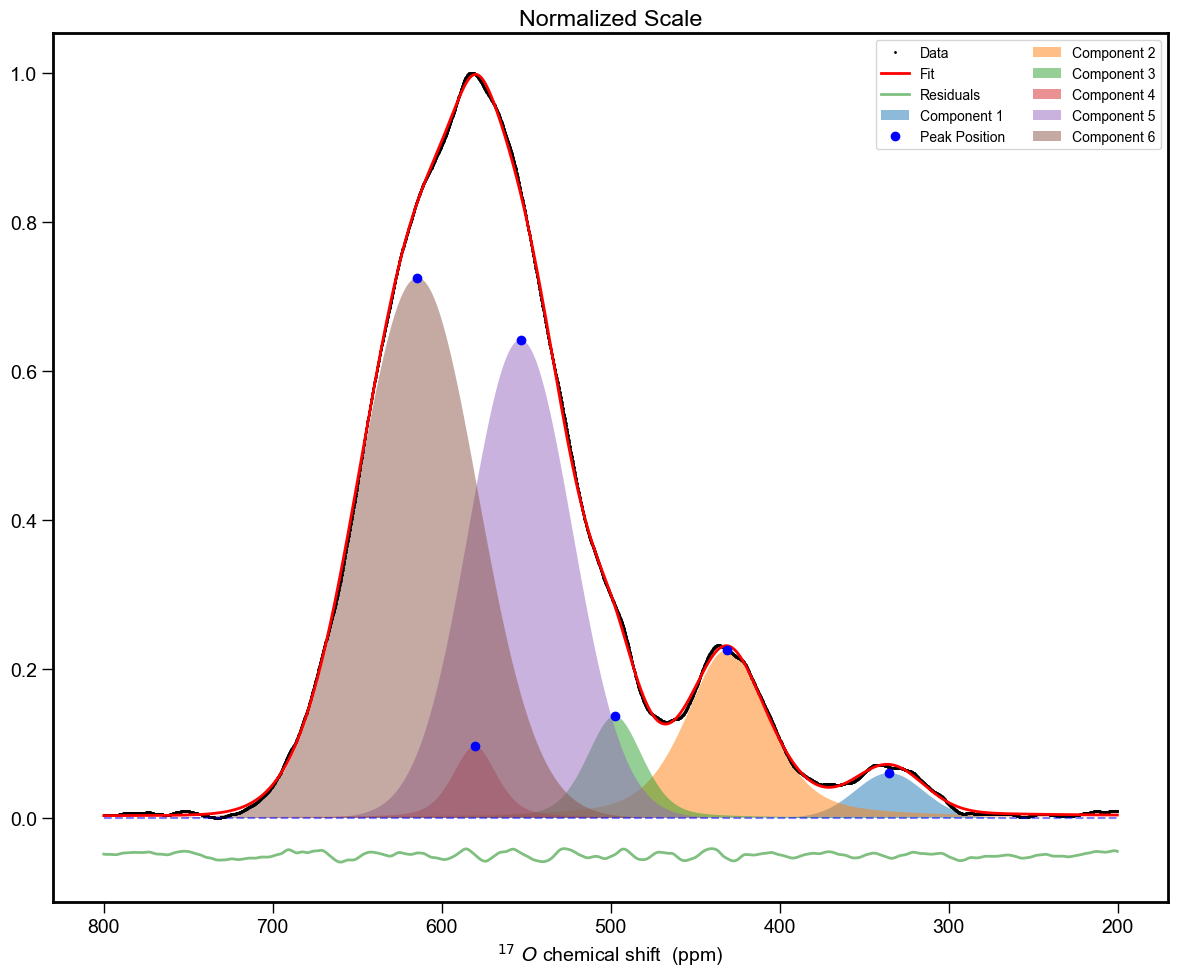

In [1]:
from nmrlineshapeanalyser.core import NMRProcessor

#create NMRProcessor object

processor = NMRProcessor()

#Load filepath
filepath = r"..\..\data\six_peaks\5\pdata\1"


# Load the data

processor.load_data(filepath)

#Select the region of interest

x_data, y_data = processor.select_region(200, 800)

#Normalize the data and return normalised y_axis and the corresponding x_axis

x_data, y_normalized = processor.normalize_data(x_data, y_data)

#define initial parameters for the fitting
#this example is for a single peak
#format of the parameters is [x0, amplitude, width, eta, offset]
# x0 (position), amplitude, width, eta (mixing parameter), offset
#x0 has to be close to the peak position
initial_params = [
                  334, 0.12, 40.51, 0.89, -143.115, 
                  430, 0.12, 40.51, 0.89, -143.115,
                  497, 0.219, 55.43, 0.52, -143.115,
                  562, 0.12, 40.51, 0.89, -143.115,
                  581, 0.219, 55.43, 0.52, -143.155,
                  623, 0.12, 40.51, 0.89, -143.115
                  ]

# fixed_x0 controls whether peak positions should be fixed during fitting
# False means position can vary, True means position is fixed
fixed_x0 = [False]*6

#FIt the data
popt, metrics, fitted = processor.fit_peaks(x_data, y_normalized, initial_params, fixed_x0)

#popt is the optimized parameters
#metrics is the metrics of the fitting
#fitted is the fitted curve data

#Plot and examine the results of the fitting
fig, axes, components = processor.plot_results(x_data, y_normalized, fitted, popt)

#Save the figure as an svg file and the results as a csv file
processor.save_results(filepath, x_data, y_normalized, fitted, metrics, popt, components)